## Creating Histograms

In the cells below I import packages, import the summary citation dataset, and create indicator variables for external and abrupt patents. Then histograms and summary statistics are created for the following categories: internal incremental, internal abrupt, and external abrupt.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Setting plot colors
cmap1 = matplotlib.cm.get_cmap('summer')
%matplotlib notebook

In [2]:
#Loading data as a pandas dataset
data2 = pd.read_csv('cit_external_comn_share.csv', sep = ',', header = 0, index_col = 0)
#Deleting patents before 1976
data2 = data2[data2.appyear > 1975]

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [23]:
abr_cut = 0.1
data2['external_share'] = data2.external_share.replace(np.nan, -1)
level = np.rint(np.size(data2['tot_cit_correct'].dropna())
                                                   - abr_cut * np.size(data2['tot_cit_correct'].
                                                                   dropna()))
cutoff = np.sort(data2['tot_cit_correct'].dropna())[int(level)]
cutoff

10.6616

In [24]:
#This function will be used to determine whether a patent is abrupt or incremental.
#A patent at the top 10% of expected citations is set to be aprupt

def abrupt(cites, cutoff):
    #The cutoff value that defines an abrupt innovation can be adjusted
    if cites >= cutoff:
        return 0
    else:
        return 1
    
#Creating a new column for the indicator variable 'incremental'
data2['Increment'] = data2['tot_cit_correct'].apply(abrupt, cutoff = cutoff)
data2['tot_abr_inc_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_correct']
data2['tot_abr_class_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_class_correct']

#Defining External Patents
#The definition will depend on the share of citations that are external.
#That variable has many missing values for patents with no citations. This line replaces
#those missing values with -1. 
data2['external_share'] = data2.external_share.replace(np.nan, -1)
#Now I define a function to determine whether a patent is external
def external(cites):
    cutoff = 0.5
    if cites >= cutoff:
        return 1
    else:
        return 0
data2['External'] = data2['external_share'].apply(external)
print(np.mean(data2['Increment']))

0.899991542938089


In [25]:
print(np.size(data2[data2.External == 1]))
print(np.size(data2[data2.External == 0]))

7194660
30643540


<IPython.core.display.Javascript object>


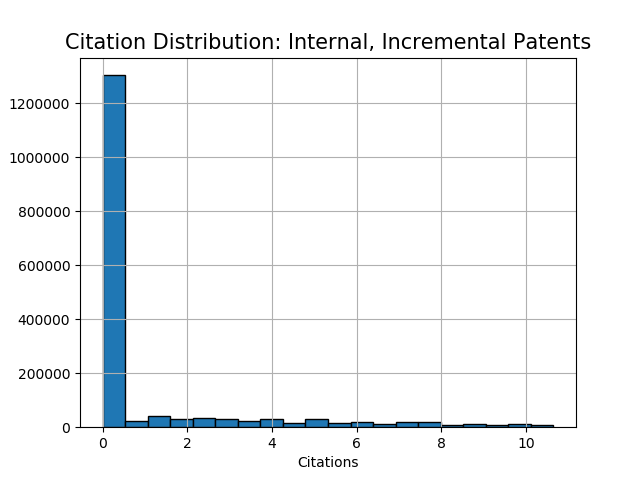

Total, mean, standard deviation: 1702703 , 1.0452714309813296 , 2.293187572379963


<IPython.core.display.Javascript object>


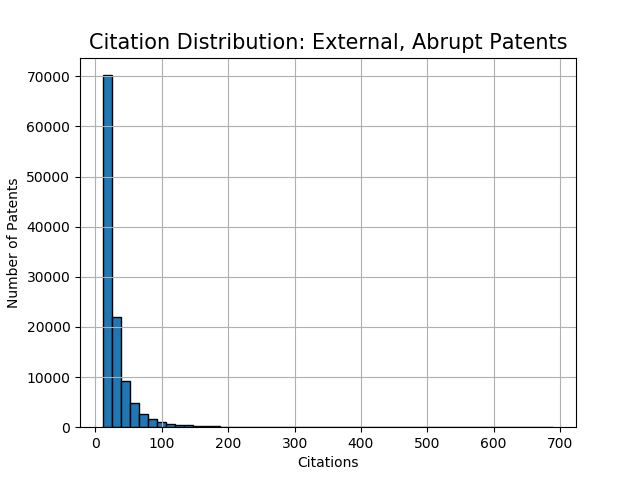

Total, mean, standard deviation: 114129 , 28.814540231672943 , 28.17667128751444


<IPython.core.display.Javascript object>


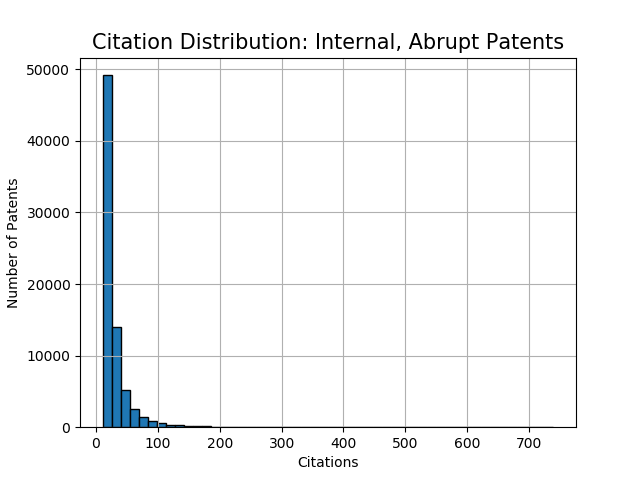

Total, mean, standard deviation: 75078 , 27.93105510536077 , 27.04466507355299


<IPython.core.display.Javascript object>


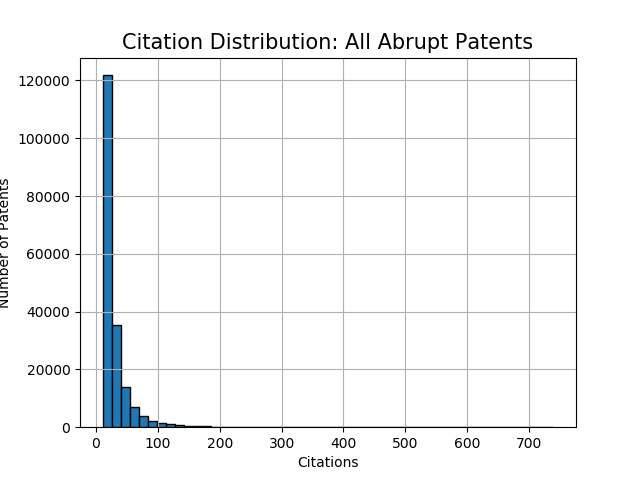

Total, mean, standard deviation: 189207 , 28.463970240531847 , 27.736385607322156


<IPython.core.display.Javascript object>


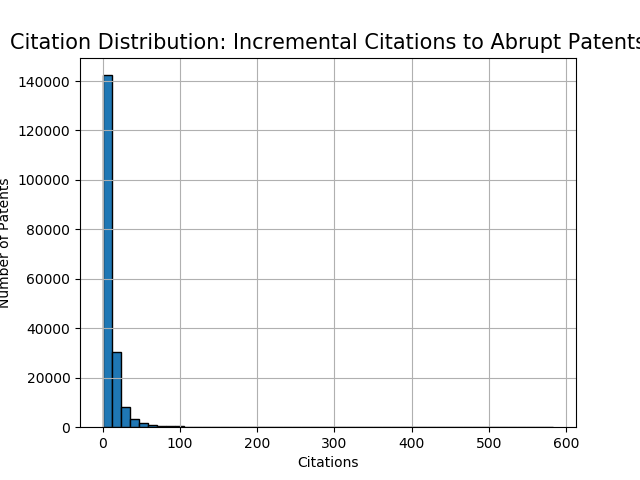

Total, mean, standard deviation: 189207 , 8.850634295773176 , 16.309264325805366


<IPython.core.display.Javascript object>


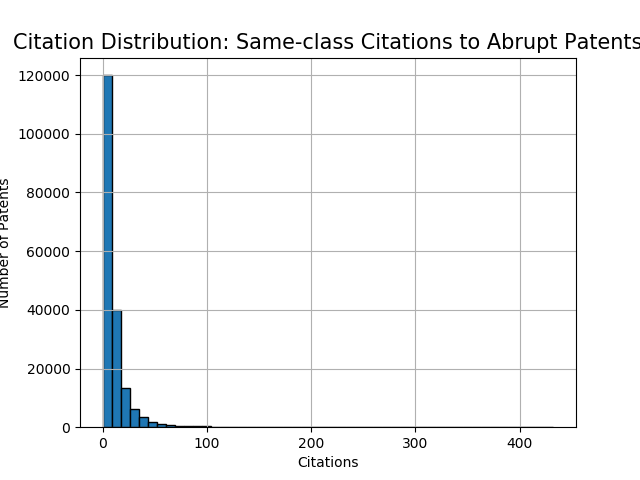

Total, mean, standard deviation: 189207 , 10.06398987669824 , 18.42557679906264
Summary Statistics for "External, incremental patents: 
Total, mean, standard deviation: 245604 , 4.331616420835091 , 2.7039458463977164


In [26]:
#data3 = data2[data2.icl_class == 'G01N']
#data3.hist(column = 'appyear')

#Plotting internal incremental innovation
#Eliminated observations that are not internal incremental
data3 = data2[data2.Increment == 1]
data3.hist(column = 'tot_cit_correct', bins = 20, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Incremental Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
#Printing out summary statistics
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#External Abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 1)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: External, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Internal abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total abrupt innovation
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: All Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total incremental citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_inc_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Incremental Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_abr_inc_cit_correct),',',
      np.std(data3.tot_abr_inc_cit_correct))

#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(
    data3.tot_abr_class_cit_correct),',', np.std(data3.tot_abr_class_cit_correct))

#Printing the amount of observations that would be "external incremental"
data3 = data2[(data2.Increment == 1) & (data2.External == 1)]
print('Summary Statistics for "External, incremental patents: ')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

## Testing how varying the Parameters affects the distribution (can be used to choose moments)

1.0


<IPython.core.display.Javascript object>


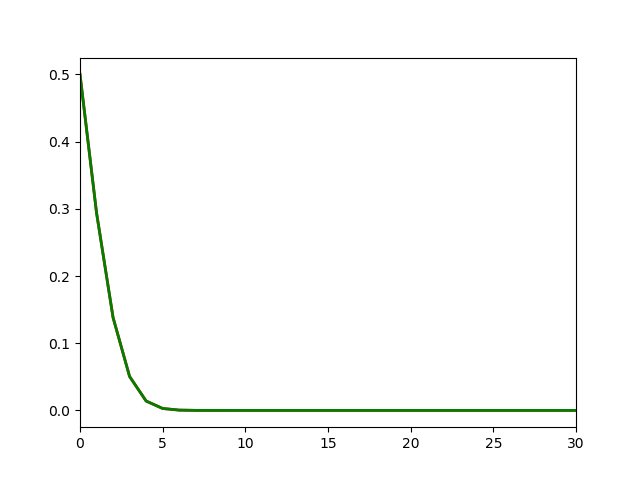

(0, 30)

In [7]:
def pdf_eta2(lambda_inc_0, alpha, tau_lambda_int_abr, ndim):
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0] + tau_lambda_int_abr)
    #eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0])
    eta_k_mod = [None] * ndim
    eta_k_mod[0] = eta_0
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_k_mod[i-1] * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))
    '''
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_0 * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))**i
    '''
    return eta_k_mod

ndim = 750
lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test = 5.5, .7, 5.5
print(np.sum(pdf_eta2(lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test, ndim)))

dist_pts = np.arange(ndim)
plt.figure(11)
plt.plot(dist_pts, pdf_eta2(lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test, ndim),
         linewidth=2, color='r')
plt.plot(dist_pts, pdf_eta2(.01*lamda_inc_0_test, alpha_test, .01*tau_lamda_int_abr_test, ndim),
         linewidth=2, color='g')
plt.xlim([0, 30])

## Estimation

In [8]:
def pdf_eta(lambda_inc_k, tau_lambda_int_abr):
    
    eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0] + tau_lambda_int_abr)
    eta_k_mod = [None] * len(lambda_inc_k)
    eta_k_mod[0] = eta_0
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_k_mod[i-1] * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))
    
    return eta_k_mod

In [9]:
def model_moments(lambda_inc_k, tau_lambda_int_abr):
    
    eta_k_mod = pdf_eta(lambda_inc_k, tau_lambda_int_abr)
    lambda_inc_mod = np.dot(eta_k_mod, lambda_inc_k)
    eta_k_mean_mod = np.dot(eta_k_mod, np.arange(len(lambda_inc_k)))
    eta_k_var_mod = np.dot(np.multiply(np.arange(len(lambda_inc_k)) - eta_k_mean_mod,
                                     np.arange(len(lambda_inc_k)) - eta_k_mean_mod), eta_k_mod)
    bpct_4_mod = np.dot(eta_k_mod[0:20], np.linspace(0, 19, 20))
    eta_k_ske_mod = np.dot(np.multiply(np.multiply(((np.arange(len(lambda_inc_k)) - eta_k_mean_mod)/eta_k_var_mod),
                                    ((np.arange(len(lambda_inc_k)) - eta_k_mean_mod)/eta_k_var_mod)),
                                     ((np.arange(len(lambda_inc_k)) - eta_k_mean_mod)/eta_k_var_mod))
                         , eta_k_mod)
    bpct_5_mod = np.dot(eta_k_mod[20:40], np.linspace(20, 39, 20))
    share_inc_mod = lambda_inc_mod / (lambda_inc_mod + tau_lambda_int_abr)
    RD_intens_mod = 0.106 * 0.346 * (1 / (share_inc_mod)) * np.dot(pdf_eta(lambda_inc_k,
                                                                   tau_lambda_int_abr),
                                             np.multiply(lambda_inc_k, lambda_inc_k)
                                            ) / 0.075547
    
    return eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod

def data_moments(xvals):
    
    unique, counts = np.unique(xvals, return_counts=True)
    eta_k_data = counts / np.size(np.array(xvals))
#    seq = np.linspace(0, 15490, 15491)
#    lambda_inc_k_data = np.array(0.8 * 0.95**seq)
#    lambda_inc_data = np.dot(eta_k_data, lambda_inc_k_data)
    bpct_4_data = np.dot(eta_k_data[0:20], np.linspace(0, 19, 20))
    bpct_5_data = np.dot(eta_k_data[20:40], np.linspace(20, 39, 20))
    share_inc_data = 0.8999
    RD_intens_data = 0.06797109
    
    return np.mean(xvals), np.var(xvals), bpct_4_data, bpct_5_data

def err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple):
    
    eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod = model_moments(
        lambda_inc_k, tau_lambda_int_abr)
    moms_mod = np.array([[eta_k_mean_mod], [eta_k_var_mod], [bpct_4_mod], [bpct_5_mod]])
    eta_k_mean_data, eta_k_var_data, bpct_4_data, bpct_5_data = data_moments(xvals)
    moms_data = np.array([[eta_k_mean_data], [eta_k_var_data], [bpct_4_data], [bpct_5_data]])
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    
    return err_vec

def crit_abr_distr(params, *args):
    
    tau_lambda_int_abr, lambda_inc_0, alpha = params
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    err = err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

def crit_abr_distr2(params, *args):
    
    tau_lambda_int_abr, alpha = params
    lambda_inc_0 = 1.0
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    err = err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [20]:
cit_abr = data2[(data2.Increment == 0)]
abr_dist_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna().value_counts()) / np.size(
    np.array(cit_abr.tot_abr_class_cit_correct.dropna()))
np.size(abr_dist_data)
np.max(cit_abr.tot_cit_correct)
print(np.mean(abr_dist_data))
print(np.mean(cit_abr.tot_abr_class_cit_correct))

6.1743640405e-05
6.202898321956586


In [66]:
tau_lambda_int_abr_init = 0.5
lambda_inc_0_init = 2
alpha_init = 0.95
W_hat = np.eye(4)
#W_hat = np.diag((1000000,100,1))
params_init = np.array([tau_lambda_int_abr_init, lambda_inc_0_init, alpha_init])
bnds = ((1e-5, None),(1e-5, None),(0.5, 1-1e-5))
ndim = 750 #This is the number of dimensions that we will sum over. I use 750 because 741 is the maximum in the data.
Est_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (Est_data, W_hat, ndim)

results_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
tau_lambda_int_abr_GMM, lambda_inc_0_GMM, alpha_GMM = results_abr_distr.x
print('tau_lambda_int_abr_GMM=', tau_lambda_int_abr_GMM, 'lambda_inc_0_GMM=', lambda_inc_0_GMM,
      'alpha_GMM=', alpha_GMM)
print('ratio=', tau_lambda_int_abr_GMM/lambda_inc_0_GMM)
print(results_abr_distr.fun)

tau_lambda_int_abr_GMM= 3.98243230137 lambda_inc_0_GMM= 0.0514814485153 alpha_GMM= 0.97841163955
ratio= 77.356648195
[[ 2.99735805]]


In [72]:
tau_lambda_int_abr_init = 77.356
lambda_inc_0_init = 2
alpha_init = 0.5
W_hat = np.eye(4)
#W_hat = np.diag((1000000,100,1))
params_init = np.array([tau_lambda_int_abr_init, alpha_init])
bnds = ((1e-5, None),(0.5, 1-1e-5))
ndim = 750 #This is the number of dimensions that we will sum over. I use 750 because 741 is the maximum in the data.
Est_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (Est_data, W_hat, ndim)
'''
results_abr_distr = opt.minimize(crit_abr_distr2, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_abr_distr = opt.minimize(crit_abr_distr2, params_init, args=(gmm_args),
                                 method='Nelder-Mead')

tau_lambda_int_abr_GMM2, alpha_GMM2 = results_abr_distr.x
lambda_inc_0_GMM2 = 1.0
print('tau_lambda_int_abr_GMM=', tau_lambda_int_abr_GMM2,
      'alpha_GMM=', alpha_GMM2)
print(results_abr_distr.fun)

C:\Users\Scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply
C:\Users\Scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in power
C:\Users\Scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Users\Scott\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:540: RuntimeWarning: invalid value encountered in less
  if fxe < fxr:
C:\Users\Scott\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:536: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\Users\Scott\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:547: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\Users\Scott\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:552: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:


tau_lambda_int_abr_GMM= 79.0424782854 alpha_GMM= 2.582885607
2.99735435322


In [69]:
results_abr_distr

      fun: array([[ 2.99735807]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.57571742e-06,  -4.61852778e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([ 77.356,   0.97 ])

In [59]:
seq = np.arange(ndim)
lambda_inc_k_GMM = np.array(lambda_inc_0_GMM * alpha_GMM**seq)
eta_k_mean_data, eta_k_var_data, bpct_4_data, bpct_5_data = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod = model_moments(lambda_inc_k_GMM,
                                                              tau_lambda_int_abr_GMM)

err1 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM, tau_lambda_int_abr_GMM, False).reshape(4,)
print('eta_k_mean_mod = ', eta_k_mean_mod, 'eta_k_var_mod = ', eta_k_var_mod,
      'bpct_4_mod = ', bpct_4_mod, 'bpct_5_mod = ', bpct_5_mod)
print('eta_k_mean_data = ', eta_k_mean_data, 'eta_k_var_data = ', eta_k_var_data,
      'bpct_4_data = ', bpct_4_data, 'bpct_5_data = ', bpct_5_data)
print('Error vector=', err1)

eta_k_mean_mod =  0.000669422907554 eta_k_var_mod =  0.000669422907547 bpct_4_mod =  0.000669422907554 bpct_5_mod =  4.18473502555e-120
eta_k_mean_data =  10.0639898767 eta_k_var_data =  339.501880378 bpct_4_data =  0.012906499231 bpct_5_data =  0.053496963643
Error vector= [-0.99993348 -0.99999803 -0.94813288 -1.        ]


In [60]:
sum_eta = np.sum(pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM))
lambda_inc_GMM = np.dot(pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM), lambda_inc_k_GMM)
print(sum_eta, lambda_inc_GMM, tau_lambda_int_abr_GMM)

1.0 0.0514642199684 76.8784865108


<IPython.core.display.Javascript object>


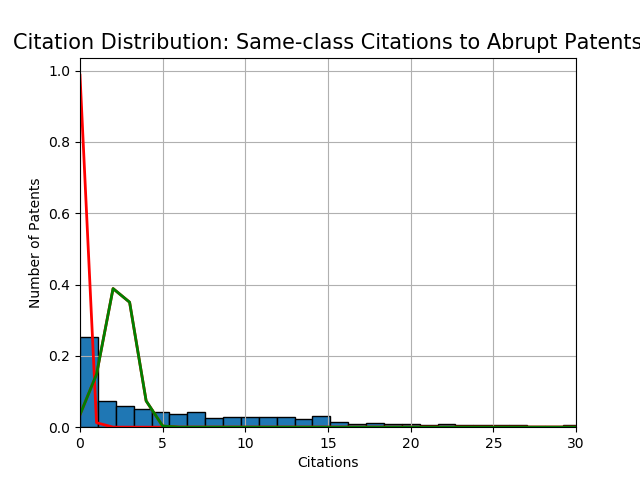

(0, 30)

In [16]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM),
         linewidth=2, color='r')
plt.xlim([0, 30])

In [17]:
err1 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM, tau_lambda_int_abr_GMM, False)
VCV2 = np.dot(err1, err1.T) / np.size(np.array(cit_abr.tot_abr_class_cit_correct.dropna()))
print(VCV2)
W_hat2 = lin.pinv(VCV2)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2)

[[  5.27165156e-06   5.27822637e-06  -6.96575714e-09   5.27842978e-06]
 [  5.27822637e-06   5.28480938e-06  -6.97444483e-09   5.28501305e-06]
 [ -6.96575714e-09  -6.97444483e-09   9.20428293e-12  -6.97471362e-09]
 [  5.27842978e-06   5.28501305e-06  -6.97471362e-09   5.28521672e-06]]
[[  2.10060235e+04   2.10322223e+04  -2.77565497e+01   2.10330328e+04]
 [  2.10322223e+04   2.10584537e+04  -2.77911677e+01   2.10592652e+04]
 [ -2.77565497e+01  -2.77911677e+01   3.66764346e-02  -2.77922387e+01]
 [  2.10330328e+04   2.10592652e+04  -2.77922387e+01   2.10600768e+04]]


In [18]:
#params_init = np.array([tau_lambda_int_abr_GMM - 9.3, lambda_inc_0_GMM, alpha_GMM])
params_init = np.array([tau_lambda_int_abr_GMM-3.9, lambda_inc_0_GMM, alpha_GMM])
bnds = ((1e-5, None),(1e-5, None),(1e-5, 1-1e-5))
ndim = 750
gmm_args = (np.array(cit_abr.tot_abr_class_cit_correct.dropna()), W_hat2, ndim)
results2_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results2_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
tau_lambda_int_abr_GMM2, lambda_inc_0_GMM2, alpha_GMM2 = results2_abr_distr.x
print('tau_lambda_int_abr_GMM2=', tau_lambda_int_abr_GMM2, 'lambda_inc_0_GMM2=', lambda_inc_0_GMM2,
      'alpha_GMM2=', alpha_GMM2)
print(results2_abr_distr.fun)

tau_lambda_int_abr_GMM2= 0.0824150396654 lambda_inc_0_GMM2= 0.361725649921 alpha_GMM2= 0.978416154704
[[ -2.38651669e-11]]


In [19]:
results2_abr_distr

      fun: array([[ -2.38651669e-11]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.61835791,  0.27281377,  4.13660353])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 92
      nit: 4
   status: 0
  success: True
        x: array([ 0.08241504,  0.36172565,  0.97841615])

In [20]:
seq = np.arange(ndim)
lambda_inc_k_GMM2 = np.array(lambda_inc_0_GMM2 * alpha_GMM2**seq)
eta_k_mean_data2, eta_k_var_data2, bpct_4_data2, bpct_5_data2 = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod2, eta_k_var_mod2, bpct_4_mod2, bpct_5_mod2 = model_moments(lambda_inc_k_GMM2,
                                                                 tau_lambda_int_abr_GMM2)

err2 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2, False).reshape(4,)
print('eta_k_mean_mod2 = ', eta_k_mean_mod2, 'eta_k_var_mod2 = ', eta_k_var_mod2,
      'bpct_4_mod2 = ', bpct_4_mod2, 'bpct_5_mod2 = ', bpct_5_mod2)
print('eta_k_mean_data2 = ', eta_k_mean_data2, 'eta_k_var_data2 = ', eta_k_var_data2,
      'bpct_4_data2 = ', bpct_4_data2, 'bpct_5_data2 = ', bpct_5_data2)
print('Error vector=', err2)

eta_k_mean_mod2 =  4.03510213157 eta_k_var_mod2 =  17.4568196543 bpct_4_mod2 =  3.87750671588 bpct_5_mod2 =  0.157386921518
eta_k_mean_data2 =  10.0639898767 eta_k_var_data2 =  339.501880378 bpct_4_data2 =  0.012906499231 bpct_5_data2 =  0.053496963643
Error vector= [  -0.59905543   -0.94858108  299.43055413    1.94197859]


<IPython.core.display.Javascript object>


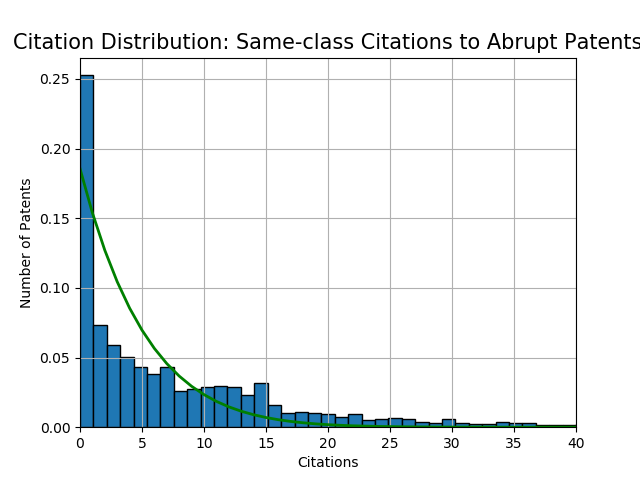

In [23]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 40])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2),
         linewidth=2, color='g')

In [24]:
sum_eta = np.sum(pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2))
lambda_inc_GMM2 = np.dot(pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2), lambda_inc_k_GMM2)
print(sum_eta, lambda_inc_GMM2, tau_lambda_int_abr_GMM2)

1.0 0.332553102227 0.0824150396654


### Identification

In [33]:
def model_moments2(lambda_inc_k, tau_lambda_int_abr):
    
    eta_k_mod = pdf_eta(lambda_inc_k, tau_lambda_int_abr)
    lambda_inc_mod = np.dot(eta_k_mod, lambda_inc_k)
    eta_k_mean_mod = np.dot(eta_k_mod, np.arange(len(lambda_inc_k)))
    eta_k_var_mod = np.dot(np.multiply(np.arange(len(lambda_inc_k)) - eta_k_mean_mod,
                                     np.arange(len(lambda_inc_k)) - eta_k_mean_mod), eta_k_mod)
    bpct_4_mod = np.dot(eta_k_mod[0:20], np.linspace(0, 19, 20))
    eta_k_ske_mod = np.dot(np.multiply(np.multiply(((np.arange(len(lambda_inc_k)) - eta_k_mean_mod)/eta_k_var_mod),
                                    ((np.arange(len(lambda_inc_k)) - eta_k_mean_mod)/eta_k_var_mod)),
                                     ((np.arange(len(lambda_inc_k)) - eta_k_mean_mod)/eta_k_var_mod))
                         , eta_k_mod)
    bpct_5_mod = np.dot(eta_k_mod[20:40], np.linspace(20, 39, 20))
    share_inc_mod = lambda_inc_mod / (lambda_inc_mod + tau_lambda_int_abr)
    RD_intens_mod = 0.106 * 0.346 * (1 / (share_inc_mod)) * np.dot(pdf_eta(lambda_inc_k,
                                                                   tau_lambda_int_abr),
                                             np.multiply(lambda_inc_k, lambda_inc_k)
                                            ) / 0.075547
    
    return eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod

def data_moments2(xvals):
    
    unique, counts = np.unique(xvals, return_counts=True)
    eta_k_data = counts / np.size(np.array(xvals))
#    seq = np.linspace(0, 15490, 15491)
#    lambda_inc_k_data = np.array(0.8 * 0.95**seq)
#    lambda_inc_data = np.dot(eta_k_data, lambda_inc_k_data)
    bpct_4_data = np.dot(eta_k_data[0:20], np.linspace(0, 19, 20))
    bpct_5_data = np.dot(eta_k_data[20:40], np.linspace(20, 39, 20))
    share_inc_data = 0.8999
    RD_intens_data = 0.06797109
    
    return np.mean(xvals), np.var(xvals), bpct_4_data, bpct_5_data

def err_vec2(xvals, lambda_inc_k, tau_lambda_int_abr, simple):
    
    eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod = model_moments2(
        lambda_inc_k, tau_lambda_int_abr)
    moms_mod = np.array([[eta_k_mean_mod], [eta_k_var_mod], [bpct_4_mod], [bpct_5_mod]])
    eta_k_mean_data, eta_k_var_data, bpct_4_data, bpct_5_data = data_moments2(xvals)
    moms_data = np.array([[eta_k_mean_data], [eta_k_var_data], [bpct_4_data], [bpct_5_data]])
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    
    return err_vec

def crit_abr_distr2(params, *args):
    
    tau_lambda_int_abr, lambda_inc_0 = params
    xvals, W, ndim, alpha = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    err = err_vec2(xvals, lambda_inc_k, tau_lambda_int_abr, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [38]:
tau_lambda_int_abr_init = tau_lambda_int_abr_GMM2
lambda_inc_0_init = lambda_inc_0_GMM2
#alpha_fixed = alpha_GMM2
alpha_fixed = 1.0
W_hat = W_hat2
#W_hat = np.diag((1000000,100,1))
params_init = np.array([tau_lambda_int_abr_init, lambda_inc_0_init])
bnds = ((1e-5, None),(1e-5, None))
ndim = 750 #This is the number of dimensions that we will sum over. I use 750 because 741 is the maximum in the data.
Est_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (Est_data, W_hat, ndim, alpha_fixed)
'''
results_abr_distr_noalpha = opt.minimize(crit_abr_distr2, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_abr_distr_noalpha = opt.minimize(crit_abr_distr2, params_init, args=(gmm_args),
                                 method='Nelder-Mead')

tau_lambda_int_abr_GMM_noalpha, lambda_inc_0_GMM_noalpha = results_abr_distr_noalpha.x
print('tau_lambda_int_abr_GMM_noalpha=', tau_lambda_int_abr_GMM_noalpha,
      'lambda_inc_0_GMM_noalpha=', lambda_inc_0_GMM_noalpha, 'alpha_GMM_noalpha=', alpha_fixed)
print(results_abr_distr_noalpha.fun)
print('tau_lambda_int_abr_GMM2=', tau_lambda_int_abr_GMM2, 'lambda_inc_0_GMM2=', lambda_inc_0_GMM2,
      'alpha_GMM2=', alpha_GMM2)
print(results2_abr_distr.fun)

tau_lambda_int_abr_GMM_noalpha= 0.0922585298184 lambda_inc_0_GMM_noalpha= 0.325294465439 alpha_GMM_noalpha= 1.0
2.21438440501e-11
tau_lambda_int_abr_GMM2= 0.0824150396654 lambda_inc_0_GMM2= 0.361725649921 alpha_GMM2= 0.978416154704
[[ -2.38651669e-11]]


In [807]:
print('tau_lambda_int_abr_GMM2=', tau_lambda_int_abr_GMM2,
      'lambda_inc_0_GMM2=', lambda_inc_0_GMM2, 'alpha_GMM2=', alpha_GMM2)

tau_lambda_int_abr_GMM2= 0.0824150396654 lambda_inc_0_GMM2= 0.361725649921 alpha_GMM2= 0.978416154704


In [808]:
seq = np.arange(ndim)
lambda_inc_k_GMM_noalpha = np.array(lambda_inc_0_GMM_noalpha * 1**seq)
eta_k_mean_data_noalpha, eta_k_var_data_noalpha, bpct_4_data_noalpha, bpct_5_data_noalpha = data_moments2(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod_noalpha, eta_k_var_mod_noalpha, bpct_4_mod_noalpha, bpct_5_mod_noalpha = model_moments2(lambda_inc_k_GMM_noalpha,
                                                                 tau_lambda_int_abr_GMM_noalpha)

err_noalpha = err_vec2(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM_noalpha, tau_lambda_int_abr_GMM_noalpha, False).reshape(4,)
print('eta_k_mean_mod_noalpha = ', eta_k_mean_mod_noalpha, 'eta_k_var_mod_noalpha = ', eta_k_var_mod_noalpha,
      'bpct_4_mod_noalpha= ', bpct_4_mod_noalpha, 'bpct_5_mod_noalpha= ', bpct_5_mod_noalpha)
print('eta_k_mean_data_noalpha = ', eta_k_mean_data_noalpha, 'eta_k_var_data_noalpha = ', eta_k_var_data_noalpha,
     'bpct_4_data_noalpha= ', bpct_4_data_noalpha, 'bpct_5_data_noalpha= ', bpct_5_data_noalpha)
print('Error vector=', err_noalpha)

eta_k_mean_mod_noalpha =  0.0129235283094 eta_k_var_mod_noalpha =  0.0130905458934 bpct_4_mod_noalpha=  0.0129235283094 bpct_5_mod_noalpha=  2.61456428227e-37
eta_k_mean_data_noalpha =  10.0639898767 eta_k_var_data_noalpha =  339.501880378 bpct_4_data_noalpha=  0.012906499231 bpct_5_data_noalpha=  0.053496963643
Error vector= [-0.99871586 -0.99996144  0.00131942 -1.        ]


In [809]:
seq = np.arange(ndim)
lambda_inc_k_GMM2 = np.array(lambda_inc_0_GMM2 * alpha_GMM2**seq)
eta_k_mean_data2, eta_k_var_data2, bpct_4_data2, bpct_5_data2 = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod2, eta_k_var_mod2, bpct_4_mod2, bpct_5_mod2 = model_moments(lambda_inc_k_GMM2,
                                                                 tau_lambda_int_abr_GMM2)

err2 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2, False).reshape(4,)
print('eta_k_mean_mod2 = ', eta_k_mean_mod2, 'eta_k_var_mod2 = ', eta_k_var_mod2,
      'bpct_4_mod2 = ', bpct_4_mod2, 'bpct_5_mod2 = ', bpct_5_mod2)
print('eta_k_mean_data2 = ', eta_k_mean_data2, 'eta_k_var_data2 = ', eta_k_var_data2,
      'bpct_4_data2 = ', bpct_4_data2, 'bpct_5_data2 = ', bpct_5_data2)
print('Error vector=', err2)

eta_k_mean_mod2 =  4.03510213157 eta_k_var_mod2 =  17.4568196543 bpct_4_mod2 =  3.87750671588 bpct_5_mod2 =  0.157386921518
eta_k_mean_data2 =  10.0639898767 eta_k_var_data2 =  339.501880378 bpct_4_data2 =  0.012906499231 bpct_5_data2 =  0.053496963643
Error vector= [  -0.59905543   -0.94858108  299.43055413    1.94197859]


<IPython.core.display.Javascript object>


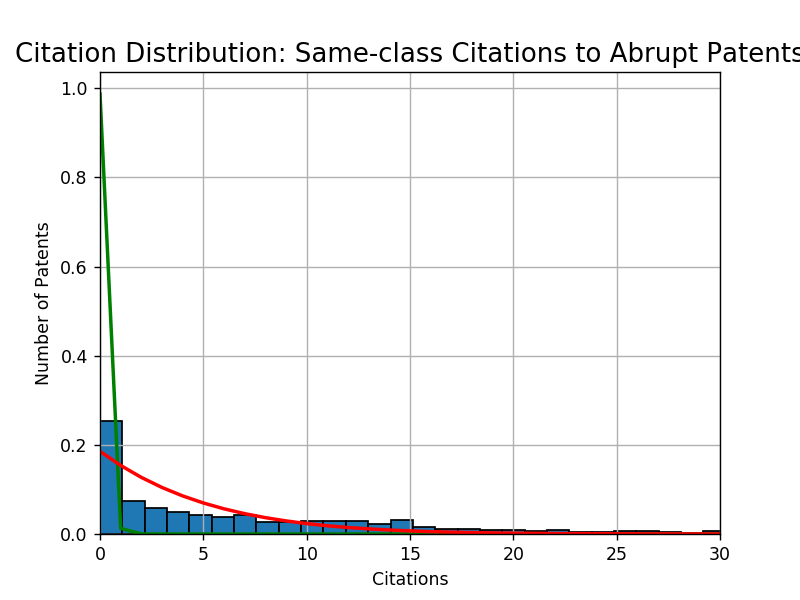

In [810]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM_noalpha, tau_lambda_int_abr_GMM_noalpha),
         linewidth=2, color='g')
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2),
         linewidth=2, color='r')

In [832]:
params_init = np.array([tau_lambda_int_abr_GMM-3.9, lambda_inc_0_GMM])
bnds = ((1e-5, None),(1e-5, None))
ndim = 750 #This is the number of dimensions that we will sum over. I use 750 because 741 is the maximum in the data.
Est_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (Est_data, W_hat2, ndim)

results2_abr_distr_noalpha = opt.minimize(crit_abr_distr2, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)

tau_lambda_int_abr_GMM2_noalpha, lambda_inc_0_GMM2_noalpha = results2_abr_distr_noalpha.x
print('tau_lambda_int_abr_GMM2_noalpha=', tau_lambda_int_abr_GMM2_noalpha,
      'lambda_inc_0_GMM2_noalpha=', lambda_inc_0_GMM2_noalpha)
print(results2_abr_distr_noalpha.fun)
print('tau_lambda_int_abr_GMM2=', tau_lambda_int_abr_GMM2, 'lambda_inc_0_GMM2=', lambda_inc_0_GMM2,
      'alpha_GMM2=', alpha_GMM2)

tau_lambda_int_abr_GMM2_noalpha= 1.02812888127 lambda_inc_0_GMM2_noalpha= 0.0131689126774
[[  5.98267592e-13]]
tau_lambda_int_abr_GMM2= 0.0824150396654 lambda_inc_0_GMM2= 0.361725649921 alpha_GMM2= 0.978416154704


In [833]:
seq = np.arange(ndim)
lambda_inc_k_GMM2_noalpha = np.array(lambda_inc_0_GMM2_noalpha * 1**seq)
eta_k_mean_data2_noalpha, eta_k_var_data2_noalpha, bpct_4_data2_noalpha, bpct_5_data2_noalpha = data_moments2(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod2_noalpha, eta_k_var_mod2_noalpha, bpct_4_mod2_noalpha, bpct_5_mod2_noalpha = model_moments2(lambda_inc_k_GMM2_noalpha,
                                                                 tau_lambda_int_abr_GMM2_noalpha)

err2_noalpha = err_vec2(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM2_noalpha, tau_lambda_int_abr_GMM2_noalpha, False).reshape(4,)
print('eta_k_mean_mod2_noalpha = ', eta_k_mean_mod2_noalpha, 'eta_k_var_mod2_noalpha = ', eta_k_var_mod2_noalpha,
      'bpct_4_mod2_noalpha = ', bpct_4_mod2_noalpha, 'bpct_5_mod2_noalpha = ', bpct_5_mod2_noalpha)
print('eta_k_mean_data2_noalpha = ', eta_k_mean_data2_noalpha, 'eta_k_var_data2_noalpha = ', eta_k_var_data2_noalpha,
      'bpct_4_data2_noalpha = ', bpct_4_data2_noalpha, 'bpct_5_data2_noalpha = ', bpct_5_data2_noalpha)
print('Error vector=', err2_noalpha)

eta_k_mean_mod2_noalpha =  0.0128086205117 eta_k_var_mod2_noalpha =  0.0129726812711 bpct_4_mod2_noalpha =  0.0128086205117 bpct_5_mod2_noalpha =  2.19183286054e-37
eta_k_mean_data2_noalpha =  10.0639898767 eta_k_var_data2_noalpha =  339.501880378 bpct_4_data2_noalpha =  0.012906499231 bpct_5_data2_noalpha =  0.053496963643
Error vector= [-0.99872728 -0.99996179 -0.00758368 -1.        ]


In [773]:
seq = np.arange(ndim)
lambda_inc_k_GMM2 = np.array(lambda_inc_0_GMM2 * alpha_GMM2**seq)
eta_k_mean_data2, eta_k_var_data2, bpct_4_data2, bpct_5_data2 = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod2, eta_k_var_mod2, bpct_4_mod2, bpct_5_mod2 = model_moments(lambda_inc_k_GMM2,
                                                                 tau_lambda_int_abr_GMM2)

err2 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2, False).reshape(4,)
print('eta_k_mean_mod2 = ', eta_k_mean_mod2, 'eta_k_var_mod2 = ', eta_k_var_mod2,
      'bpct_4_mod2 = ', bpct_4_mod2, 'bpct_5_mod2 = ', bpct_5_mod2)
print('eta_k_mean_data2 = ', eta_k_mean_data2, 'eta_k_var_data2 = ', eta_k_var_data2,
      'bpct_4_data2 = ', bpct_4_data2, 'bpct_5_data2 = ', bpct_5_data2)
print('Error vector=', err2)

eta_k_mean_mod2 =  4.03510213157 eta_k_var_mod2 =  17.4568196543 bpct_4_mod2 =  3.87750671588 bpct_5_mod2 =  0.157386921518
eta_k_mean_data2 =  10.0639898767 eta_k_var_data2 =  339.501880378 bpct_4_data2 =  0.012906499231 bpct_5_data2 =  0.053496963643
Error vector= [  -0.59905543   -0.94858108  299.43055413    1.94197859]


### Maximum Likelihood Estimation
Important: the variable tau_lambda_int_abr is used as a stand in for the ratio between tau_lambda_int_abr and lambda_inc_0. That is, during the estimations lambda_inc_0 is normalized to one. Afterwards, I solve for the actual values of lambda_inc_0 and tau_lambda_int_abr using the r&d intensity.

In [11]:
def log_lik(xvals, lambda_inc_k, alpha, tau_lambda_int_abr):
    lik_array = np.zeros(len(xvals))
    pmf = pdf_eta(lambda_inc_k, tau_lambda_int_abr)
    rounded = np.round(xvals)
    for n in range(0, len(xvals)):
        lik_array[n] = pmf[np.int(rounded[n])]
    
    lik_array[lik_array < 1e-20] = 1e-20
    loglik_array = np.log(lik_array)
    
    return np.sum(loglik_array)

def crit_log_lik(params, *args):
    tau_lambda_int_abr, alpha = params
    lambda_inc_0 = 1.0
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    loglik = log_lik(xvals, lambda_inc_k, alpha, tau_lambda_int_abr)
    crit_val = -loglik
    #print(params, crit_val)
    
    return crit_val

def crit_log_lik_noalpha(params, *args):
    tau_lambda_int_abr = params
    lambda_inc_0 = 1.0
    xvals, W, ndim, alpha = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    loglik = log_lik(xvals, lambda_inc_k, alpha, tau_lambda_int_abr)
    crit_val = -loglik
    #print(params, crit_val)
    
    return crit_val

In [21]:
#This cell does the normal log likelihood estimation
tau_lambda_int_abr_init = 2.0
alpha_init = 0.9
params_init = np.array([tau_lambda_int_abr_init, alpha_init])
bnds = ((1e-5, None),(1e-5, 1-1e-5))
ndim = 750
W = np.eye(3)
MLE_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (MLE_data, W, ndim)

results_MLE = opt.minimize(crit_log_lik, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_MLE = opt.minimize(crit_log_lik, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
lambda_inc_0_MLE = 1.0
tau_lambda_int_abr_MLE, alpha_MLE = results_MLE.x
print('tau_lambda_int_abr_MLE=', tau_lambda_int_abr_MLE,
      'alpha_MLE=', alpha_MLE)
print('-log likelihood =', results_MLE.fun)

#Outputting inverse hessian matrix
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results_MLE.hess_inv * OffDiagNeg
stderr_ratio_mle = np.sqrt(vcv_mle[0,0])
#stderr_alpha_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
#print('Standard error for ratio estimate = ', stderr_ratio_mle)
#print('Standard error for alpha estimate = ', stderr_alpha_mle)

tau_lambda_int_abr_MLE= 0.163858591263 alpha_MLE= 0.99999
-log likelihood = 1095360.21652
VCV(MLE) =  [[ 0.0174073  -0.0174073 ]
 [ 0.00749169 -0.00749169]]


In [17]:
vcv_mle

array([[ 1.85434721, -1.85434721],
       [ 0.91184822, -0.91184822]])

In [22]:
#Solving for absolute values of lambdas using compustat data on r&d intensity.:
#This function will be minimized to find the proper lambda_inc_0.
def crit_solve(params, *args):
    lambda_inc_0 = params
    ratio, alpha, ndim = args
    tau_lambda_int_abr = ratio*lambda_inc_0
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    sum_eta = np.sum(pdf_eta(lambda_inc_k, tau_lambda_int_abr))
    temp = np.reshape(pdf_eta(lambda_inc_k, tau_lambda_int_abr), (750, ))
    lambda_inc = np.dot(temp, lambda_inc_k)
    share_inc_mod3 = lambda_inc / (lambda_inc + tau_lambda_int_abr)
    RD_intens_mod3 = 0.106 * 0.346 * (1 / (share_inc_mod3)) * np.dot(temp,
                                             np.multiply(lambda_inc_k, lambda_inc_k)
                                            ) / 0.075547
    RD_intens_data = 0.06797109
    error = RD_intens_mod3 - RD_intens_data
    return error*error


ndim = 750
args = tau_lambda_int_abr_MLE, alpha_MLE, ndim
params_init = .5
bnds = ((1e-10, None), )
results = opt.minimize(crit_solve, params_init, args=args,
                                 method='L-BFGS-B', bounds = bnds)
lambda_0 = results.x
print(lambda_0, lambda_0*tau_lambda_int_abr_MLE)

[ 0.3468763] [ 0.05683866]


In [89]:
#This cell does log likelihood estimation for the ratio while alpha is fixed. 
#We see that the best value is attained when alpha equals one
tau_lambda_int_abr_init = 1
lambda_inc_0_init = 0.5
params_init = np.array([tau_lambda_int_abr_init])
bnds = ((1e-5, None))
ndim = 750
alpha_MLE2 = 0.8
W = np.eye(3)
MLE_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (MLE_data, W, ndim, alpha_MLE2)


results_MLE = opt.minimize(crit_log_lik_noalpha, params_init, args=(gmm_args),
                                 method='Nelder-Mead')

tau_lambda_int_abr_MLE2 = results_MLE.x
print('tau_lambda_int_abr_MLE=', tau_lambda_int_abr_MLE2,
      'alpha_MLE=', alpha_MLE2)
print('-log likelihood =', results_MLE.fun)

tau_lambda_int_abr_MLE= [ 0.00870361] alpha_MLE= 0.8
-log likelihood = 1181971.60536


In [79]:
print(results_MLE)
print(crit_log_lik((tau_lambda_int_abr_MLE, lambda_inc_0_MLE, 1.0), MLE_data, W, ndim))

      fun: 634963.5583590368
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0349246,  0.       ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 39
      nit: 9
   status: 0
  success: True
        x: array([ 0.18734854,  1.88318626])
(0.18734854492607528, 1.8831862596859559, 1.0) 634963.558359
634963.558359


<IPython.core.display.Javascript object>


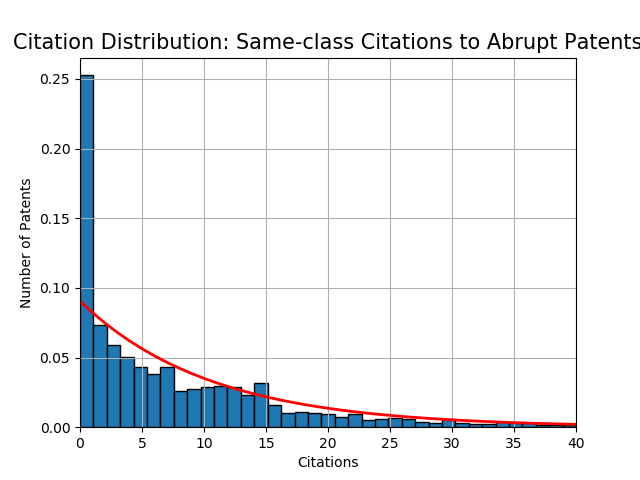

In [15]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 40])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta2(lambda_inc_0_MLE, alpha_MLE, tau_lambda_int_abr_MLE, ndim),
         linewidth=2, color='r')

In [77]:
seq = np.arange(ndim)
lambda_inc_k_MLE = np.array(lambda_inc_0_MLE * alpha_MLE**seq)
sum_eta = np.sum(pdf_eta(lambda_inc_k_MLE, tau_lambda_int_abr_MLE))
lambda_inc_MLE = np.dot(pdf_eta(lambda_inc_k_MLE, tau_lambda_int_abr_MLE), lambda_inc_k_MLE)
print(sum_eta, lambda_inc_MLE, tau_lambda_int_abr_MLE)

1.0 3.78623322601 0.376673060064


### Robustness

In [163]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod = lambda_inc_GMM / (lambda_inc_GMM + tau_lambda_int_abr_GMM)

print('share_inc_data = ', share_inc_data, 'share_inc_mod = ', share_inc_mod)

#RD intensity
RD_intens_mod = 0.106 * 0.346 * (1 / (share_inc_mod)) * np.dot(pdf_eta(lambda_inc_k_GMM,
                                                                   tau_lambda_int_abr_GMM),
                                             np.multiply(lambda_inc_k_GMM, lambda_inc_k_GMM)
                                            ) / 0.075547

RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod = ', RD_intens_mod)

share_inc_data =  0.899991542938089 share_inc_mod =  0.012758644242
RD_intens_data =  0.06797109 RD_intens_mod =  0.0282338221625


In [625]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod2 = lambda_inc_GMM2 / (lambda_inc_GMM2 + tau_lambda_int_abr_GMM2)

print('share_inc_data = ', share_inc_data, 'share_inc_mod2 = ', share_inc_mod2)

#RD intensity
RD_intens_mod2 = 0.106 * 0.346 * (1 / (share_inc_mod2)) * np.dot(pdf_eta(lambda_inc_k_GMM2,
                                                                   tau_lambda_int_abr_GMM2),
                                             np.multiply(lambda_inc_k_GMM2, lambda_inc_k_GMM2)
                                            ) / 0.075547
RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod2 = ', RD_intens_mod2)

share_inc_data =  0.899991542938089 share_inc_mod2 =  0.899248650017
RD_intens_data =  0.06797109 RD_intens_mod2 =  0.0601363351368


In [79]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod3 = lambda_inc_MLE / (lambda_inc_MLE + tau_lambda_int_abr_MLE)

print('share_inc_data = ', share_inc_data, 'share_inc_mod3 = ', share_inc_mod3)

#RD intensity
RD_intens_mod3 = 0.106 * 0.346 * (1 / (share_inc_mod3)) * np.dot(pdf_eta(lambda_inc_k_MLE,
                                                                   tau_lambda_int_abr_MLE),
                                             np.multiply(lambda_inc_k_MLE, lambda_inc_k_MLE)
                                            ) / 0.075547
RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod3 = ', RD_intens_mod3)

share_inc_data =  0.899991542938089 share_inc_mod3 =  0.909533627812


NameError: name 'lambda_inc_k_MLE' is not defined

## Entry Rate Calculations

In [5]:
Patent_evol = pd.read_csv('evol_pat_year_count_df.csv', sep = ',', header = 0, index_col = 0)
Innov_emp = pd.read_csv('Innov_emp.csv', sep = ',', header = 0, index_col = 0)
#Entry rate per 5 years (by employment)
entry_rate1976 = Patent_evol.emp[(Patent_evol.firstYear >= 1976) & (
    Patent_evol.firstYear < 1981)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1981 = Patent_evol.emp[(Patent_evol.firstYear >= 1981) & (
    Patent_evol.firstYear < 1986)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1986 = Patent_evol.emp[(Patent_evol.firstYear >= 1986) & (
    Patent_evol.firstYear < 1991)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1991 = Patent_evol.emp[(Patent_evol.firstYear >= 1991) & (
    Patent_evol.firstYear < 1996)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1996 = Patent_evol.emp[(Patent_evol.firstYear >= 1996) & (
    Patent_evol.firstYear < 2001)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate2001= Patent_evol.emp[(Patent_evol.firstYear >= 2001) & (
    Patent_evol.firstYear < 2006)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
print('Entry rates: \n1976 - 1980 = ', entry_rate1976, '\n1981 - 1985 = ', entry_rate1981,
     '\n1986 - 1990 = ', entry_rate1986, '\n1991 - 1995 = ', entry_rate1991,
     '\n1996 - 2000 = ', entry_rate1996, '\n2001 - 2005 = ', entry_rate2001)

Entry rates: 
1976 - 1980 =  0.0021245205023886736 
1981 - 1985 =  0.0023513519177680454 
1986 - 1990 =  0.002191138646583526 
1991 - 1995 =  0.001965464743272693 
1996 - 2000 =  0.0044289127179007156 
2001 - 2005 =  0.0018598440948136667


In [6]:
#Entry rate per 5 years (by nb firms)
entry_rate1976 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1976) & (
    Patent_evol.firstYear < 1981)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1976) & 
                                                          (Innov_emp.fyear < 1981)].sum()
entry_rate1981 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1981) & (
    Patent_evol.firstYear < 1986)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1981) & 
                                                          (Innov_emp.fyear < 1986)].sum()
entry_rate1986 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1986) & (
    Patent_evol.firstYear < 1991)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1986) & 
                                                          (Innov_emp.fyear < 1991)].sum()
entry_rate1991 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1991) & (
    Patent_evol.firstYear < 1996)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1991) & 
                                                          (Innov_emp.fyear < 1996)].sum()
entry_rate1996 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1996) & (
    Patent_evol.firstYear < 2001)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1996) & 
                                                          (Innov_emp.fyear < 2001)].sum()
entry_rate2001 = Patent_evol.firstYear[(Patent_evol.firstYear >= 2001) & (
    Patent_evol.firstYear < 2006)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 2001) & 
                                                          (Innov_emp.fyear < 2006)].sum()
print('Entry rates: \n1976 - 1980 = ', entry_rate1976, '\n1981 - 1985 = ', entry_rate1981,
     '\n1986 - 1990 = ', entry_rate1986, '\n1991 - 1995 = ', entry_rate1991,
     '\n1996 - 2000 = ', entry_rate1996, '\n2001 - 2005 = ', entry_rate2001)
entry_rate = np.mean(np.array([entry_rate1976, entry_rate1981, entry_rate1986, entry_rate1991
                             , entry_rate1996, entry_rate2001]))
print('Mean entry rate = ', entry_rate)
lambda_e = entry_rate

Entry rates: 
1976 - 1980 =  0.0704656355967 
1981 - 1985 =  0.0591484464902 
1986 - 1990 =  0.0625711845103 
1991 - 1995 =  0.067709919016 
1996 - 2000 =  0.0710200455328 
2001 - 2005 =  0.0266078444889
Mean entry rate =  0.0595871792725
